In [1]:
%cd ../src/

/mnt/c/Users/Jacob/Desktop/prosjektoppgave/tcav_atari/src


In [2]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from skimage import exposure
from sklearn import linear_model
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold, train_test_split

from concepts import concept_instances
from train_model import load_model
from utils import load_data, prepare_folders

In [3]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [4]:
data = load_data()
for concept in concept_instances.values():
    concept.prepare_data(data, max_size=5000)

In [5]:
def calculate_r2(train_acts, train_values, test_acts, test_values):
    reg = linear_model.LassoCV(max_iter=50, cv=5, n_alphas=5)
    reg.fit(train_acts, train_values)
    pred = reg.predict(test_acts)
    score = r2_score(test_values, pred)
    return reg, score

In [6]:
def calculate_accuracy(train_acts, train_values, test_acts, test_values):
    reg = linear_model.LogisticRegressionCV(max_iter=50, cv=5, Cs=5)
    reg.fit(train_acts, train_values)
    pred = reg.predict(test_acts)
    score = accuracy_score(test_values, pred)
    return reg, 2*score-1

random (b): 0.228
mean train value: 0.618
mean test value: 0.621


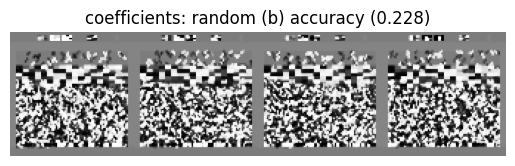

all lives (b): 1.000
mean train value: 0.498
mean test value: 0.507


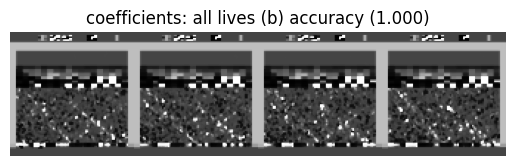

last life (b): 1.000
mean train value: 0.505
mean test value: 0.482


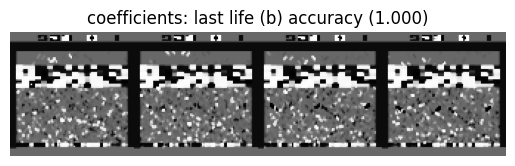

reward (b): 0.361
mean train value: 0.503
mean test value: 0.486


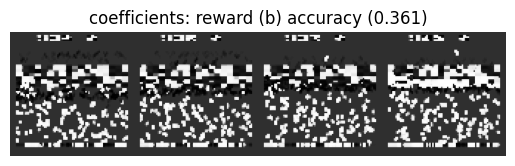

ball collision (b): 0.657
mean train value: 0.503
mean test value: 0.488


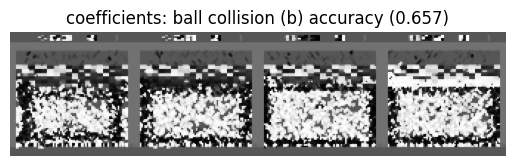

ball low (b): 0.848
mean train value: 0.508
mean test value: 0.517


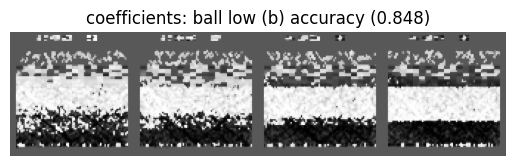

ball left paddle (b): 0.660
mean train value: 0.499
mean test value: 0.502


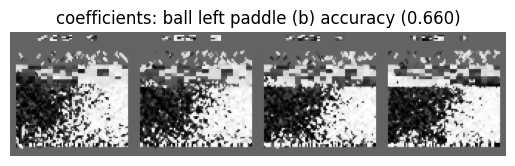

ball right paddle (b): 0.645
mean train value: 0.505
mean test value: 0.478


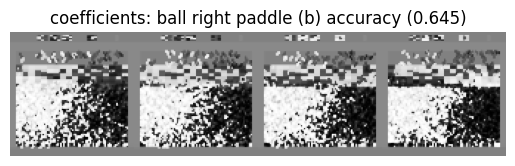

ball distance paddle: 0.693
mean train value: 63.221
mean test value: 64.785


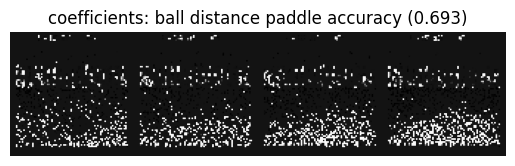

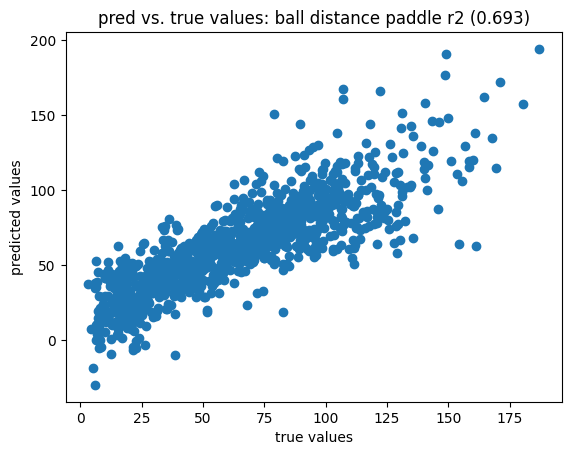

ball y: 0.660
mean train value: 140.419
mean test value: 138.975


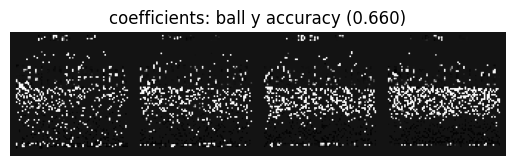

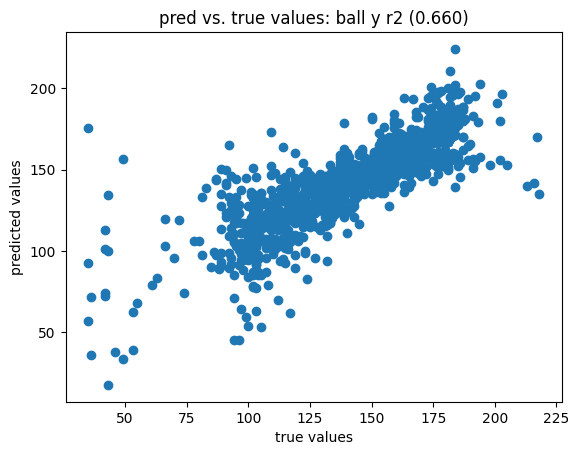

ball y next: 0.595
mean train value: 140.734
mean test value: 141.712


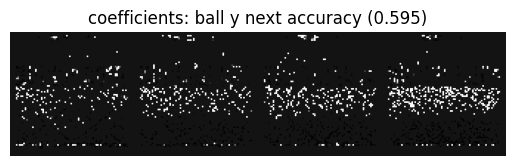

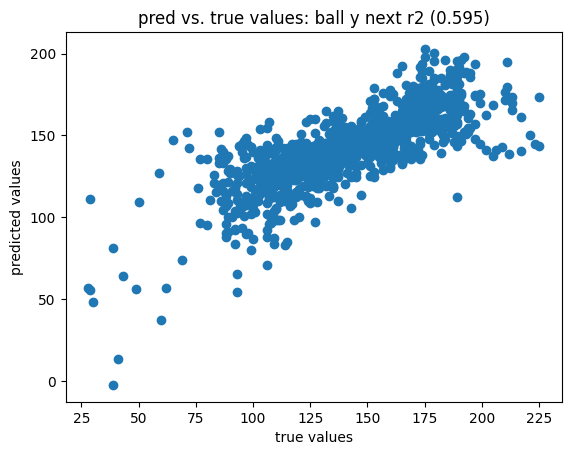

ball x: 0.793
mean train value: 75.321
mean test value: 77.358


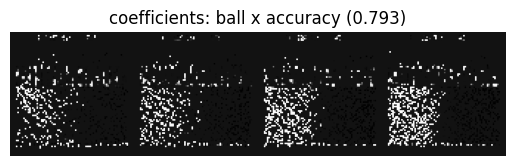

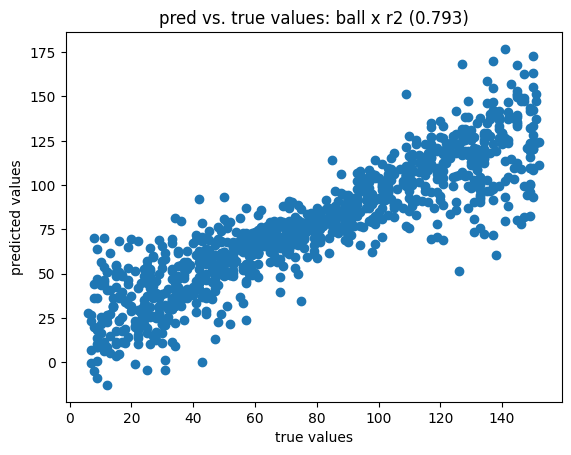

ball x next: 0.747
mean train value: 75.628
mean test value: 75.702


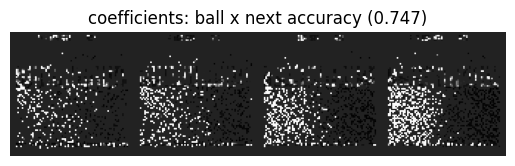

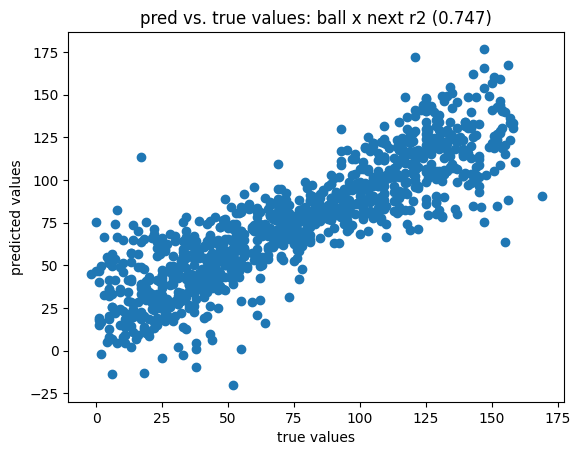

lives: 0.994
mean train value: 3.256
mean test value: 3.237


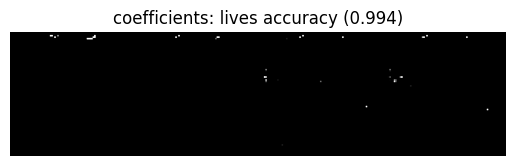

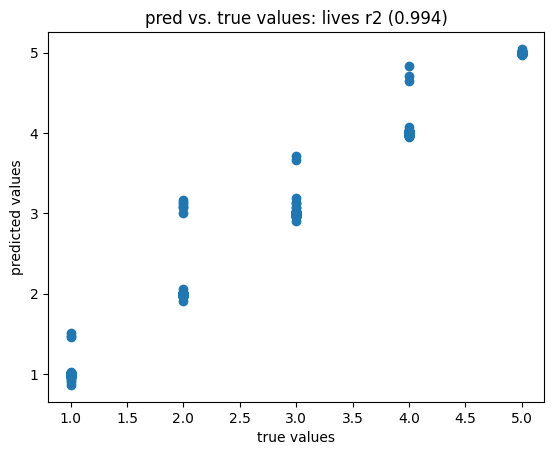

x diff: 0.405
mean train value: 32.965
mean test value: 32.166


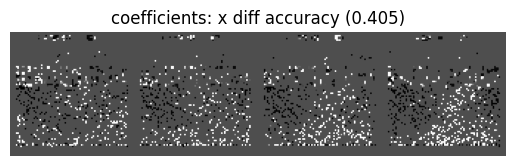

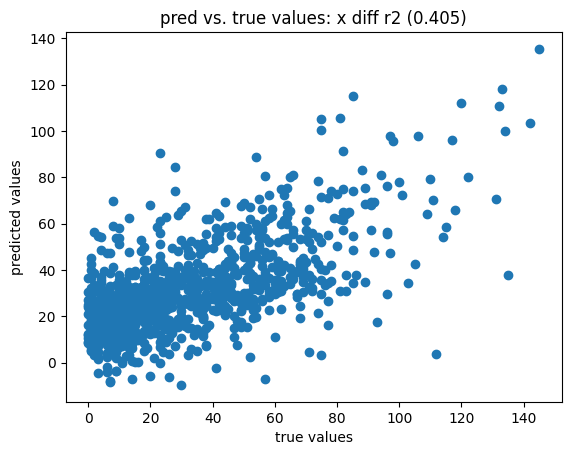

frames until collision horizontal: 0.085
mean train value: 14.062
mean test value: 13.679


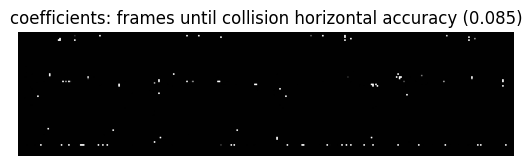

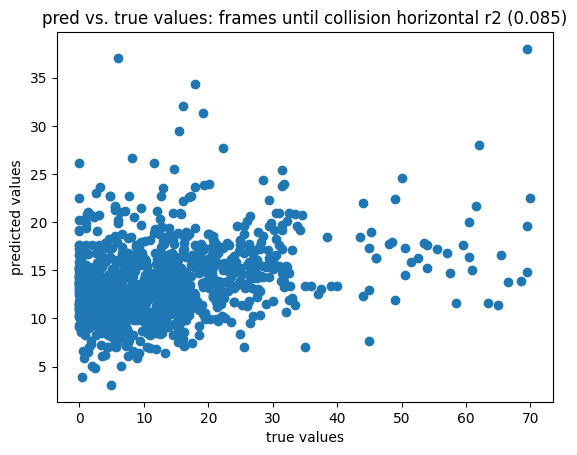

frames until collision vertical: 0.117
mean train value: 7.707
mean test value: 7.936


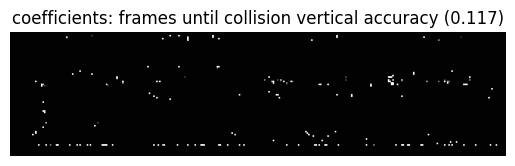

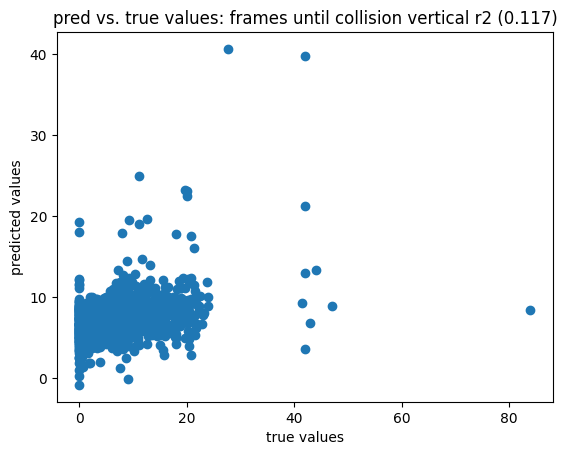

paddle x: 0.989
mean train value: 88.071
mean test value: 87.807


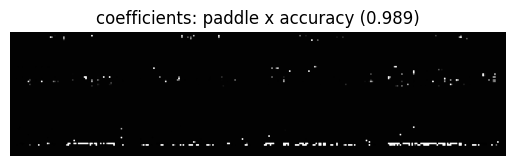

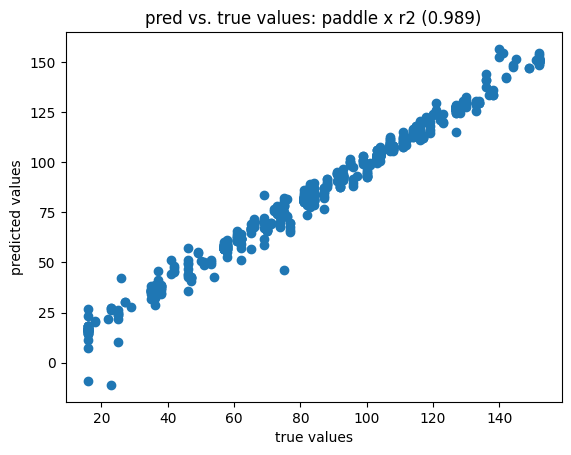

ball speed horizontal: 0.394
mean train value: 5.555
mean test value: 5.599


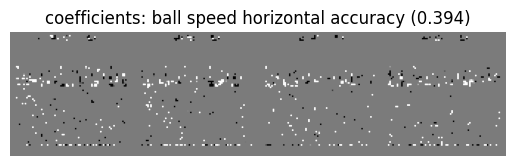

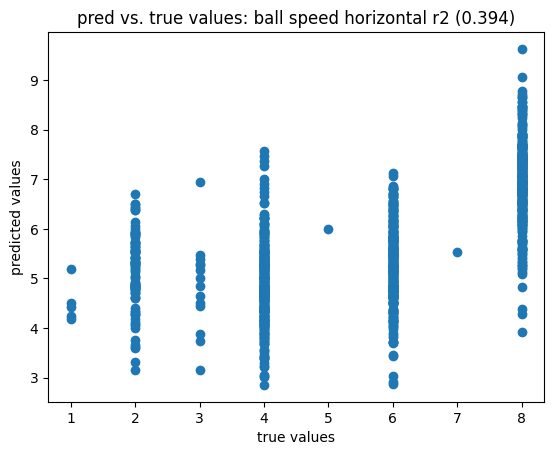

ball speed vertical: 0.233
mean train value: 5.496
mean test value: 5.548


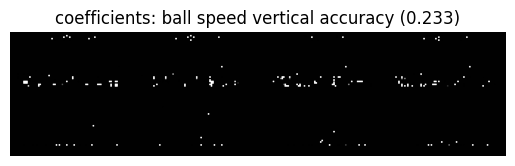

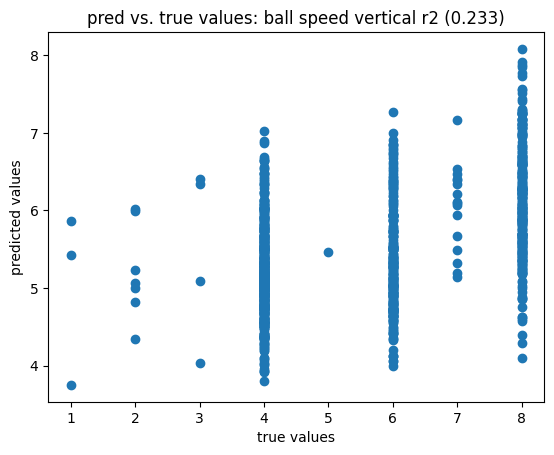

game steps: 0.995
mean train value: 585.321
mean test value: 579.358


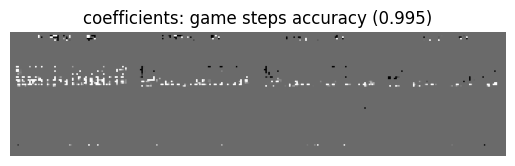

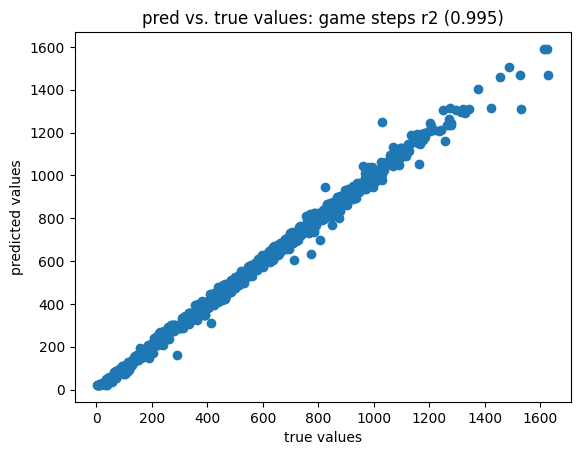

bricks hit: 0.993
mean train value: 16.814
mean test value: 17.102


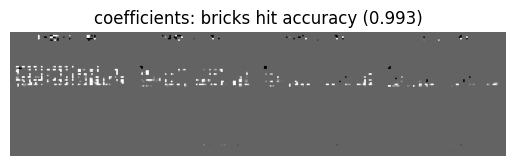

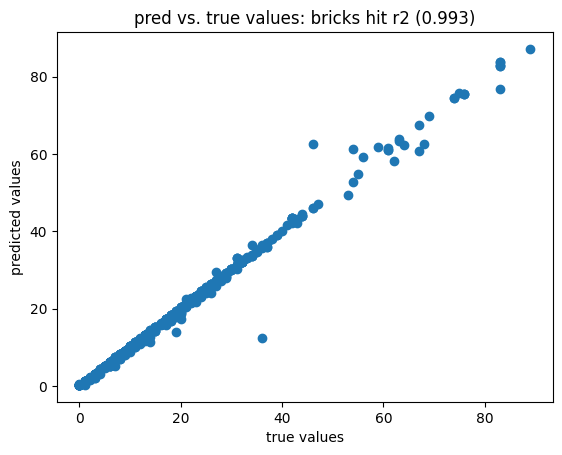

In [7]:
for concept in concept_instances.values():
    obs_train = concept.obs_train.reshape(len(concept.obs_train), -1)
    obs_test = concept.obs_test.reshape(len(concept.obs_test), -1)
    if concept.binary:
        reg, score = calculate_accuracy(obs_train, concept.values_train, obs_test, concept.values_test)
    else:
        reg, score = calculate_r2(obs_train, concept.values_train, obs_test, concept.values_test)
    print(f'{concept.name}: {score:.3f}')
    print(f'mean train value: {concept.values_train.mean():.3f}')
    print(f'mean test value: {concept.values_test.mean():.3f}')

    # plot the coefficents of reg with grey scale
    coefs = np.concatenate(reg.coef_.reshape(4,84,84), axis=1)
    normalized_image = (coefs - coefs.min()) / (coefs.max() - coefs.min())
    equalized_image = exposure.equalize_hist(normalized_image)
    plt.imshow(equalized_image, cmap="Greys")
    plt.axis('off')
    plt.title(f'coefficients: {concept.name} accuracy ({score:.3f})')
    plt.show()

    # plot preds vs. true values if non-binary
    if not concept.binary:
        plt.scatter(concept.values_test, reg.predict(obs_test))
        plt.xlabel('true values')
        plt.ylabel('predicted values')
        plt.title(f'pred vs. true values: {concept.name} r2 ({score:.3f})')
        plt.show()